In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from darcy_solver import solve_Darcy_PDE

In [2]:
def a(x):
    if x.ndim == 1:
        return np.exp(np.sin(2*np.pi*x[0]) + np.sin(2*np.pi*x[1])) + np.exp(-np.sin(2*np.pi*x[0]) - np.sin(2*np.pi*x[1]))
    elif x.ndim == 2:
        return np.exp(np.sin(2*np.pi*x[:, 0]) + np.sin(2*np.pi*x[:, 1])) + np.exp(-np.sin(2*np.pi*x[:, 0]) - np.sin(2*np.pi*x[:, 1]))

def f(x):
    if x.ndim == 1:
        return 1.0
    elif x.ndim == 2:
        return np.ones(x.shape[0])

def u(x):
    if x.ndim == 1:
        return np.sin(2*np.pi*x[0])*np.sin(2*np.pi*x[1])
    elif x.ndim == 2:
        return np.sin(2*np.pi*x[:, 0])*np.sin(2*np.pi*x[:, 1])

# def f(x):
#     if x.ndim == 1:
#         x1, x2 = x[0], x[1]
#     elif x.ndim == 2:
#         x1, x2 = x[:, 0], x[:, 1]
#     term1 = -4 * np.log(2 * np.cosh(np.sin(2 * np.pi * x1) + np.sin(2 * np.pi * x2))) * np.sin(2 * np.pi * x1) * np.sin(2 * np.pi * x2) * np.cosh(np.sin(2 * np.pi * x1) + np.sin(2 * np.pi * x2))
#     term2 = 2 * np.sin(2 * np.pi * x1) * np.cos(2 * np.pi * x2)**2 * np.sinh(np.sin(2 * np.pi * x1) + np.sin(2 * np.pi * x2))
#     term3 = 2 * np.sin(2 * np.pi * x2) * np.cos(2 * np.pi * x1)**2 * np.sinh(np.sin(2 * np.pi * x1) + np.sin(2 * np.pi * x2))
#     result = -2 * np.pi**2 * (term1 + term2 + term3) / np.cosh(np.sin(2 * np.pi * x1) + np.sin(2 * np.pi * x2))
#     return result

# def f(x):
#     if x.ndim == 1:
#         x1, x2 = x[0], x[1]
#     elif x.ndim == 2:
#         x1, x2 = x[:, 0], x[:, 1]

#     # Precompute the trigonometric and hyperbolic terms
#     sin_2pi_x1 = np.sin(2 * np.pi * x1)
#     sin_2pi_x2 = np.sin(2 * np.pi * x2)
#     cos_2pi_x1 = np.cos(2 * np.pi * x1)
#     cos_2pi_x2 = np.cos(2 * np.pi * x2)
    
#     sinh_term = np.sinh(sin_2pi_x1 + sin_2pi_x2)
#     cosh_term = np.cosh(sin_2pi_x1 + sin_2pi_x2)

#     # Compute the function
#     result = (4 * np.pi**2 * 
#               (-4 * sin_2pi_x1 * sin_2pi_x2 * cosh_term +
#                2 * sin_2pi_x1 * cos_2pi_x2**2 * sinh_term +
#                2 * sin_2pi_x2 * cos_2pi_x1**2 * sinh_term))
    
#     return -result







In [145]:
# Grid size
Nx, Ny = 200, 200
# Solve the system
u_solution = solve_Darcy_PDE(Nx, Ny, a, f)

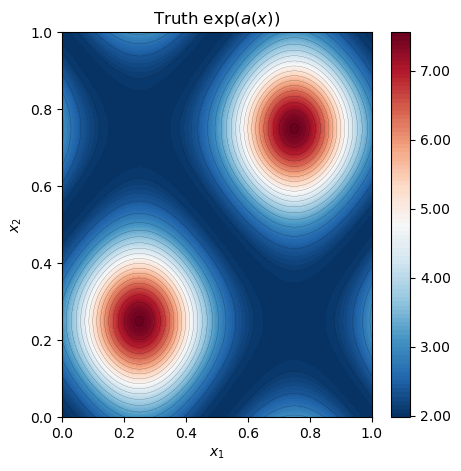

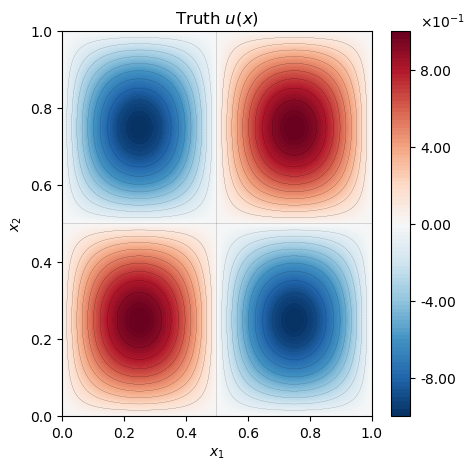

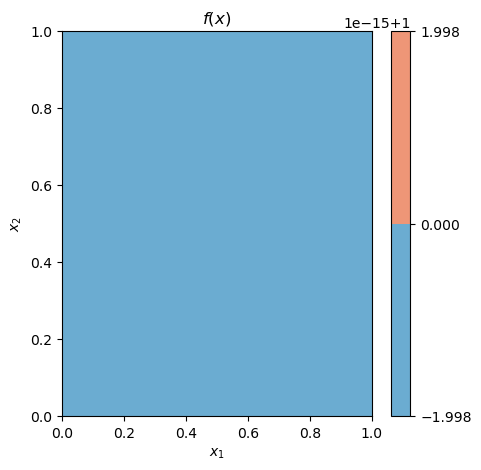

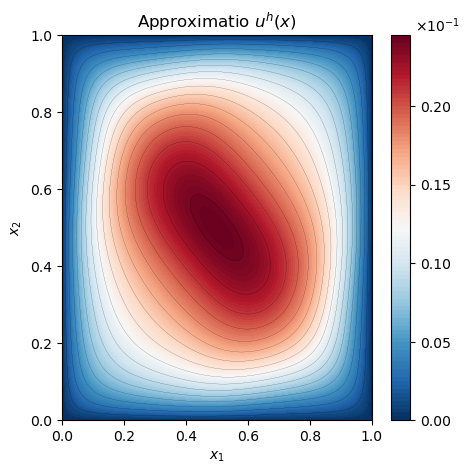

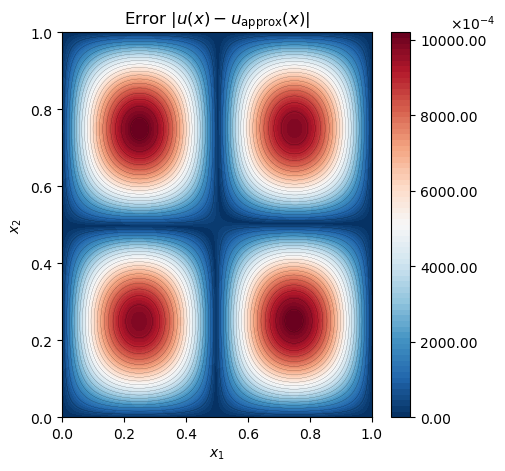

In [146]:
N = 1000
X, Y = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))


fig = plt.figure(figsize=(5, 5), dpi=100)

contour = plt.contour(X, Y, a(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 20, linewidths=0.1, colors='k')  
contourf = plt.contourf(X, Y, a(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 100, cmap='RdBu_r')

cbar = plt.colorbar(contourf, format='%.2f')
cbar.ax.yaxis.set_offset_position('left')
# cbar.set_label(r'$\times 10^{-2}$', rotation=0, labelpad=-10, y=1.05)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.locator = ticker.MaxNLocator(nbins=6)
cbar.update_ticks()


plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title(r"Truth $\exp(a(x))$")
plt.savefig("figures/a_2.pdf")
plt.show()

fig = plt.figure(figsize=(5, 5), dpi=100)

contour = plt.contour(X, Y, 10*u(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 20, linewidths=0.1, colors='k')  
contourf = plt.contourf(X, Y, 10*u(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 100, cmap='RdBu_r')

cbar = plt.colorbar(contourf, format='%.2f')
# cbar.ax.yaxis.set_offset_position('left')
cbar.set_label(r'$\times 10^{-1}$', rotation=0, labelpad=-10, y=1.05)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.locator = ticker.MaxNLocator(nbins=6)
cbar.update_ticks()


plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Truth $u(x)$")
# plt.savefig("figures/u_1.pdf")
plt.show()

fig = plt.figure(figsize=(5, 5), dpi=100)

contour = plt.contour(X, Y, f(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 20, linewidths=0.1, colors='k')  
contourf = plt.contourf(X, Y, f(np.array([X.ravel(), Y.ravel()]).T).reshape(N, N), 100, cmap='RdBu_r')

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"$f(x)$")
# plt.savefig("figures/f_1.pdf")
plt.show()


X, Y = np.meshgrid(np.linspace(0, 1, Nx+2), np.linspace(0, 1, Ny+2))
fig = plt.figure(figsize=(5, 5), dpi=100)

contour = plt.contour(X, Y, 10*u_solution, 20, linewidths=0.1, colors='k')
contourf = plt.contourf(X, Y, 10*u_solution, 100, cmap='RdBu_r')

cbar = plt.colorbar(contourf, format='%.2f')
cbar.ax.yaxis.set_offset_position('left')
cbar.set_label(r'$\times 10^{-1}$', rotation=0, labelpad=-10, y=1.05)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.locator = ticker.MaxNLocator(nbins=6)
cbar.update_ticks()

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Approximatio $u^h(x)$")
plt.savefig("figures/approximation_2.pdf")
plt.show()



err = np.abs(u(np.array([X.ravel(), Y.ravel()]).T).reshape(Nx+2, Ny+2) - u_solution)
fig = plt.figure(figsize=(5, 5), dpi=100)


# plt.imshow(err, cmap='RdBu_r')
contour = plt.contour(X, Y, 10**4 * err, 20, linewidths=0.1, colors='k')
contourf = plt.contourf(X, Y, 10**4 * err, 100, cmap='RdBu_r')

cbar = plt.colorbar(contourf, format='%.2f')
cbar.ax.yaxis.set_offset_position('left')
cbar.set_label(r'$\times 10^{-4}$', rotation=0, labelpad=-10, y=1.05)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.locator = ticker.MaxNLocator(nbins=6)
cbar.update_ticks()


plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Error $|u(x) - u_{\mathrm{approx}}(x)|$")
# plt.savefig("figures/error_1.pdf")
plt.show()


